In [1]:
import random
from math import exp,log
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y = np.array([0,1,1,1])

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
    
    def sigmoid(self,z):
        return 1/(1+exp(-z))

    def predict(self,x):
        z = np.inner(self.w,x) + self.b[0]
        a = self.sigmoid(z)
        return a

In [4]:
model = logistic_regression_model()

In [5]:
def train(X,Y,model,lr):
    dw0 = 0.0
    dw1 = 0.0
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
            
        x = np.append(x,1)
        [dw0,dw1,db] = [dw0,dw1,db] + ((a-y)*x)
        
    cost /= m
    model.w[0] -= lr * dw0/m
    model.w[1] -= lr * dw1/m
    model.b[0] -= lr * db/m
    
    return cost

In [6]:
def loss():
    loss_ = []
    for i in range(4):
        loss = -Y[i]*log(model.predict(X[i]))-(1-Y[i])*log(1-model.predict(X[i]))
        loss_.append(loss)
    return loss_

In [7]:
cost1 = []
epoch_ = []
for epoch in range(10000):
    cost = train(X,Y,model,0.1)
    cost1.append(cost)
    epoch_.append(epoch)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 1.538317598912705
500 0.12691326110937204
1000 0.07847051135283631
1500 0.056228500872089485
2000 0.04359541569407761
2500 0.03550348050457534
3000 0.02989862816201747
3500 0.025796721824498308
4000 0.02266958461727535
4500 0.020209296016191036
5000 0.018224629465074933
5500 0.016590748956732383
6000 0.015222794811281552
6500 0.014061119392364298
7000 0.01306260024847444
7500 0.012195304968762475
8000 0.011435092932234053
8500 0.010763381845120684
9000 0.010165639257112608
9500 0.009630339057937025


In [8]:
model.predict([0,0])

0.020190929207035933

In [9]:
model.predict([0,1])

0.9919431766449341

In [10]:
model.predict([1,0])

0.9919282253960159

In [11]:
model.predict([1,1])

0.9999986379906648

In [12]:
loss1 = loss()
loss1

[0.0203975520199809,
 0.008104527746335645,
 0.008089454945847506,
 1.3620102627395853e-06]

In [13]:
cost2 = []
for epoch in range(10000):
    cost = train(X,Y,model,0.01)
    cost2.append(cost)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.009148224180606698
500 0.009102637657450702
1000 0.009057499950921076
1500 0.009012804496779782
2000 0.008968544857723746
2500 0.008924714720338916
3000 0.008881307892143269
3500 0.008838318298713182
4000 0.008795739980890364
4500 0.008753567092069075
5000 0.008711793895558498
5500 0.008670414762018656
6000 0.008629424166968073
6500 0.008588816688360198
7000 0.008548587004226626
7500 0.008508729890384705
8000 0.008469240218208001
8500 0.008430112952457533
9000 0.008391343149171308
9500 0.008352925953610408


In [14]:
model.predict([0,0])

0.018363014373291447

In [15]:
model.predict([0,1])

0.9926703101503105

In [16]:
model.predict([1,0])

0.9926590637335025

In [17]:
model.predict([1,1])

0.9999989785325687

In [18]:
loss2 = loss()
loss2

[0.018533707376453275,
 0.0073680135355202025,
 0.007356684013118525,
 1.0214679530040344e-06]

In [19]:
cost3 = []
for epoch in range(10000):
    cost = train(X,Y,model,0.001)
    cost3.append(cost)
    if (epoch % 500 == 0):
        print(epoch, cost)

0 0.008314856598261252
500 0.00831106862836777
1000 0.008307284085314698
1500 0.008303502964474357
2000 0.008299725261227572
2500 0.008295950970963466
3000 0.008292180089079355
3500 0.008288412610980853
4000 0.008284648532081652
4500 0.008280887847803963
5000 0.008277130553577778
5500 0.00827337664484154
6000 0.008269626117041887
6500 0.008265878965633385
7000 0.008262135186078877
7500 0.008258394773849266
8000 0.008254657724423293
8500 0.008250924033288283
9000 0.00824719369593908
9500 0.008243466707878995


In [20]:
model.predict([0,0])

0.01819814813625657

In [21]:
model.predict([0,1])

0.9927359214584696

In [22]:
model.predict([1,0])

0.9927249753084124

In [23]:
model.predict([1,1])

0.9999990060712904

In [24]:
loss3 = loss()
loss3

[0.018365771167517808,
 0.007301616734057153,
 0.00729059042769667,
 9.939292035058564e-07]

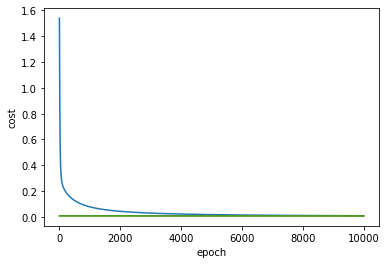

In [25]:
plt.plot(epoch_,cost1)
plt.plot(epoch_,cost2)
plt.plot(epoch_,cost3)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

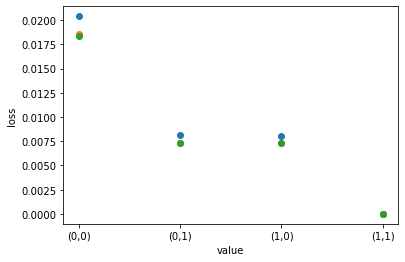

In [26]:
test = ["(0,0)","(0,1)","(1,0)","(1,1)"]
plt.plot(test,loss1,'o')
plt.plot(test,loss2,'o')
plt.plot(test,loss3,'o')
plt.xlabel("value")
plt.ylabel("loss")
plt.show()